## 6.5 Machine Learning Part 

### This script contains the following:

#### 1. Importing libraries and data and renaming column
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming column

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_revised_date.csv'))

In [5]:
df.shape

(21599, 24)

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [7]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'Unnamed: 0' : 'No'}, inplace = True)

In [8]:
df.head()

,No,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [9]:
df2 = df.drop(['date'],axis=1)

In [10]:
#create a price per sqft column

df2['price_per_sqft'] = df2['price'].div(df2['sqft_living'])

In [11]:
df2.head()

,No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,price_per_sqft
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,188.050847
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,209.338521
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,233.766234
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,308.163265
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,303.571429


# 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shyro\anaconda3\lib\site-packages\sklearn\clust

[-1.7873706050455785e+23,
 -3.607899867441679e+22,
 -1.773231083632047e+22,
 -9.884718741241226e+21,
 -6.518401413734943e+21,
 -3.9174687115693397e+21,
 -2.971140275521673e+21,
 -2.2242933226125074e+21,
 -1.7695363260092716e+21]

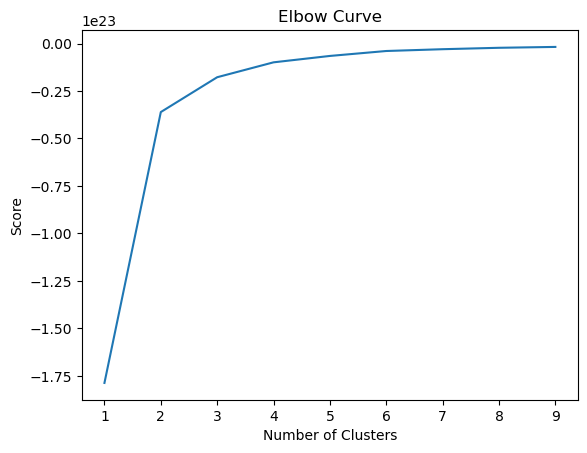

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\shyro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df2.head()

,No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,price_per_sqft,clusters
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,188.050847,1
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,209.338521,1
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,233.766234,2
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,308.163265,0
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,303.571429,0


In [28]:
df2['clusters'].value_counts()

1    7772
0    7006
2    6821
Name: clusters, dtype: int64

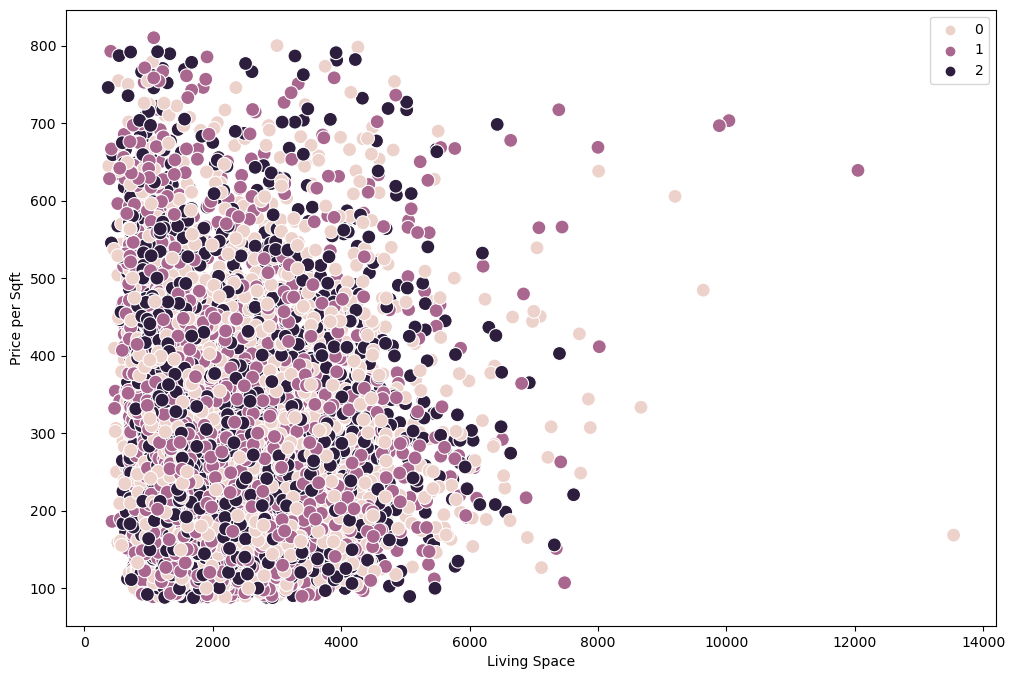

In [20]:
# Plot the clusters for the "price_per_sqft" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df2['price_per_sqft'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space') # Label x-axis.
plt.ylabel('Price per Sqft') # Label y-axis.
plt.show()

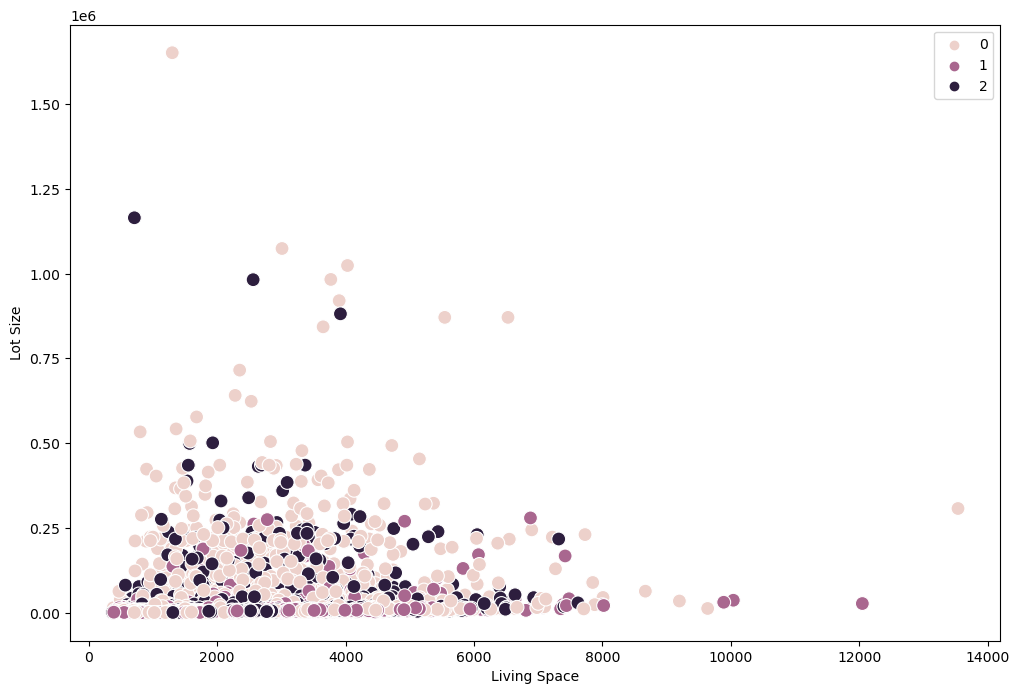

In [21]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df2['sqft_lot'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space') # Label x-axis.
plt.ylabel('Lot Size') # Label y-axis.
plt.show()

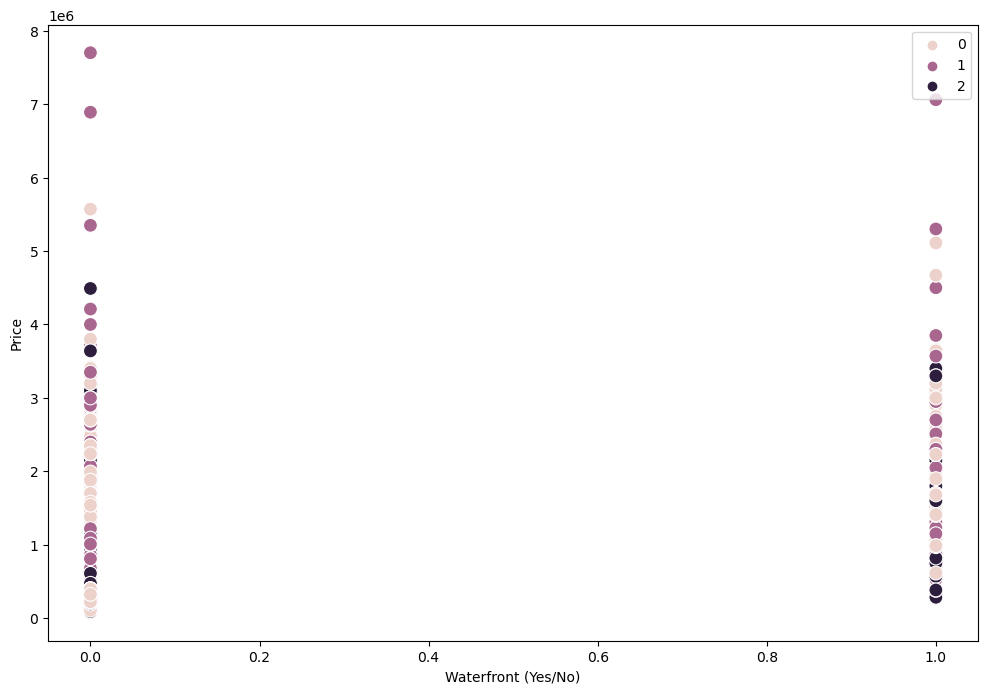

In [22]:
# Plot the clusters for the "waterfront" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['waterfront'], y=df2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Waterfront (Yes/No)') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

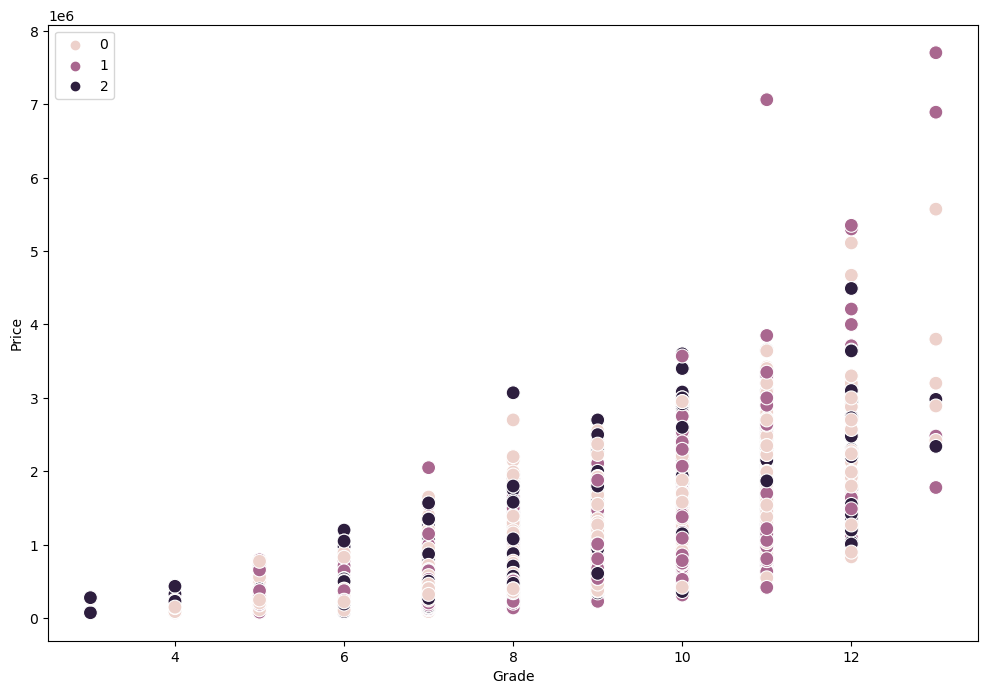

In [23]:
# Plot the clusters for the "grade" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['grade'], y=df2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Grade') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [25]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df2.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'waterfront':['mean', 'median'], 
                         'grade':['mean', 'median'],
                          'price_per_sqft':['mean', 'median'],
                          'price':['mean', 'median']})

sqft_living         waterfront            grade         \
                    mean  median       mean median      mean median   
cluster                                                               
dark purple  2064.249084  1900.0   0.006451    0.0  7.645360    7.0   
pink         2118.733514  1940.0   0.007993    0.0  7.671139    7.0   
purple       2059.310473  1910.0   0.008106    0.0  7.655816    7.0   

            price_per_sqft                      price            
                      mean      median           mean    median  
cluster                                                          
dark purple     266.808275  246.153846  539652.100865  450000.0  
pink            263.257864  242.525471  553182.830003  449114.0  
purple          262.648673  245.480275  529132.554169  455300.0